# CellXGo

## Setup environment
Anadata requires numpy 2. Therefore a environment was build for this project namely anadata

conda activate anadata

jupyter notebook

In [2]:
import numpy as np
import pandas as pd
import anndata as ad
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from itertools import compress

## Load data
Change to dataframe with gene name as column name, and cell name as row name

In [4]:
adata_new = ad.read_h5ad("../Data/adata_layer1.h5ad")  # this is a plate-based smartSeq data

df_cellXGene=pd.DataFrame(adata_new.X, index = adata_new.obs.index)
df_cellXGene.columns = adata_new.var_names
#print(df_cellXGene.head())
df_cellXGene.describe()

,A1CF,A2M,A2M_AS1,A2ML1,A2ML1_AS1,A2MP1,A3GALT2,A4GALT,AAAS,AACS,...,ZUFSP,ZW10,ZWILCH,ZWINT,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
count,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,...,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000
mean,0.172031,2.075434,0.398486,0.787305,4.172628,1.140028,0.166662,0.005519,1.813153,2.134426,...,2.342548,1.630442,0.983183,0.234569,2.760727,0.096861,4.228403,1.815390,3.354481,5.305328
std,0.739285,2.841188,1.372140,1.803852,2.847074,2.162369,0.689890,0.133345,2.798604,2.515785,...,2.661595,2.604691,2.061938,1.143399,2.804852,0.526090,2.710597,2.495130,2.787800,2.742092
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.584962,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.584962,0.000000,1.000000,3.169925
50%,0.000000,0.000000,0.000000,0.000000,4.584962,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,1.584962,0.000000,4.643856,0.000000,3.169925,6.044394
75%,0.000000,4.128694,0.000000,0.000000,6.531360,1.000000,0.000000,0.000000,3.321928,4.247928,...,4.807355,2.453445,1.000000,0.000000,5.523562,0.000000,6.499824,3.953445,5.832890,7.417852
max,8.738092,11.902752,8.379378,8.271463,11.491352,9.813781,7.727921,3.807355,11.078818,9.763212,...,9.562243,9.859535,8.643856,8.503826,10.032045,6.169925,10.721953,10.943980,11.291171,11.526988


## Sort genes into high, medium, and low expression catogories

In [6]:
gene_mean=df_cellXGene.mean()

gene_sort=gene_mean.sort_values(ascending=False)
gene_rank=gene_mean.rank(ascending=False)
#gene_sort.hist(bins=100)
#print(gene_sort.head())  # highest expression genes
#print(gene_sort.tail())  # No expression genes

#print(gene_sort.head(4000)) # 75 precentile expression
#print(gene_sort.head(8000)) # 50 precentile expression
#print(gene_sort.head(12000)) # 25% percentile expression

Text(0, 0.5, 'Frequency')

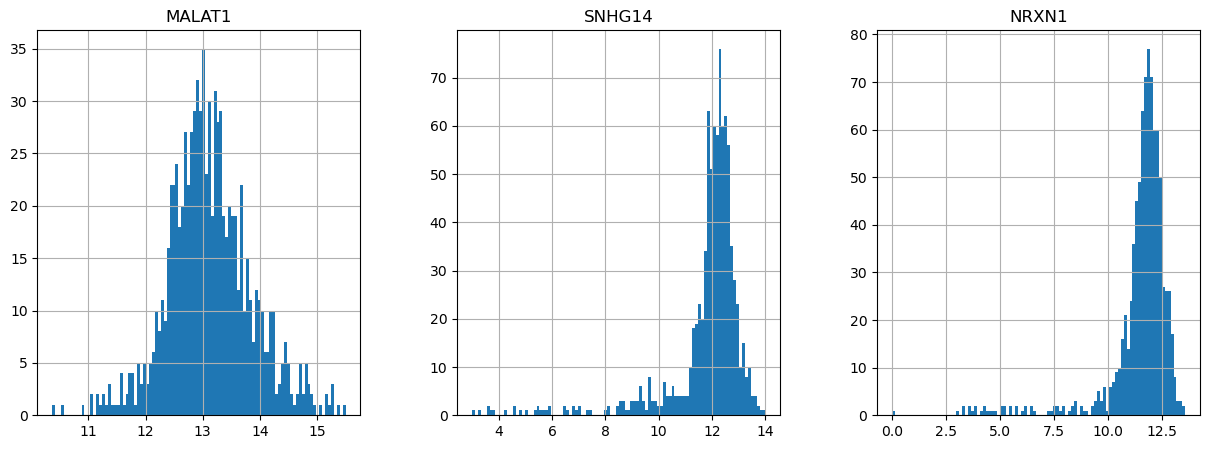

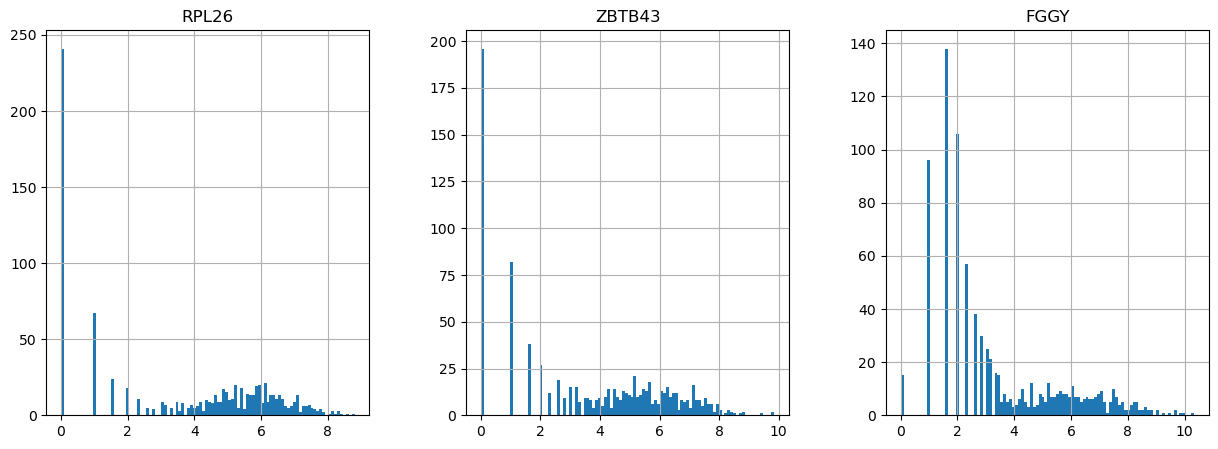

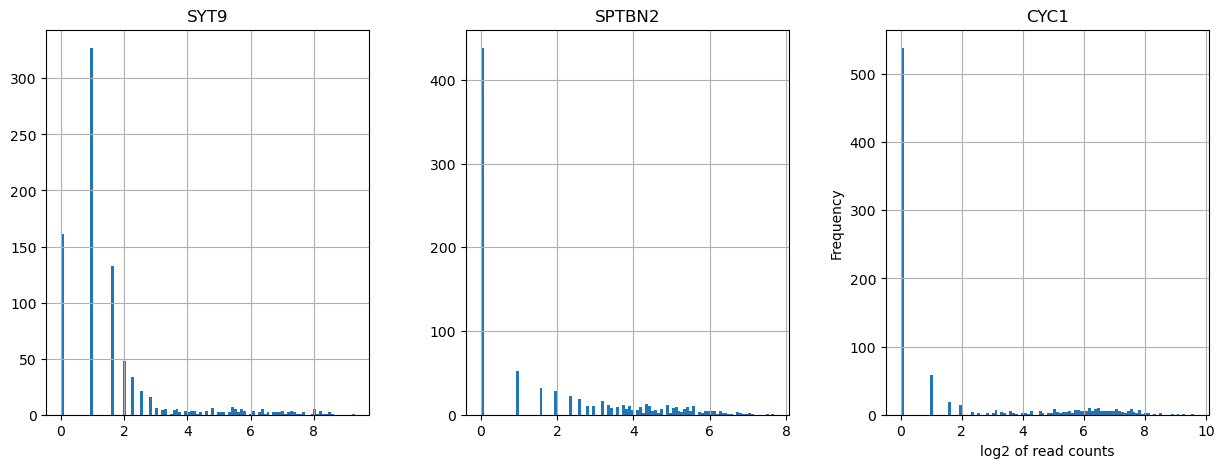

In [7]:
# histogram of the expression levels at the highest, 75% percetile, 50% percentile


df_cellXGene.hist(column=["MALAT1","SNHG14","NRXN1"], bins=100,layout=(1, 3), figsize=(15, 5))
df_cellXGene.hist(column=["RPL26","ZBTB43","FGGY"], bins=100,layout=(1, 3), figsize=(15, 5))
df_cellXGene.hist(column=["SYT9","SPTBN2","CYC1"], bins=100,layout=(1, 3), figsize=(15, 5))

plt.xlabel('log2 of read counts',ha='center')
plt.ylabel('Frequency')



## Replace Zero with Nan, then calculate the mean

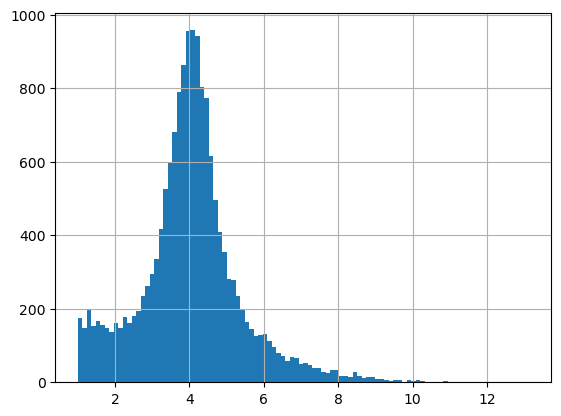

In [9]:
df_noZero = df_cellXGene.replace(0, np.nan, inplace=False)
noZeromean = df_noZero.mean(skipna=True)
noZeromean.hist(bins=100)
noZeromean_sorted = noZeromean.sort_values(ascending=False)

#print(noZeromean_sorted.head(4000)) # 75 precentile expression
#print(noZeromean_sorted.head(8000)) # 50 precentile expression
#print(noZeromean_sorted.head(12000)) # 25% percentile expression

Text(0, 0.5, 'Frequency')

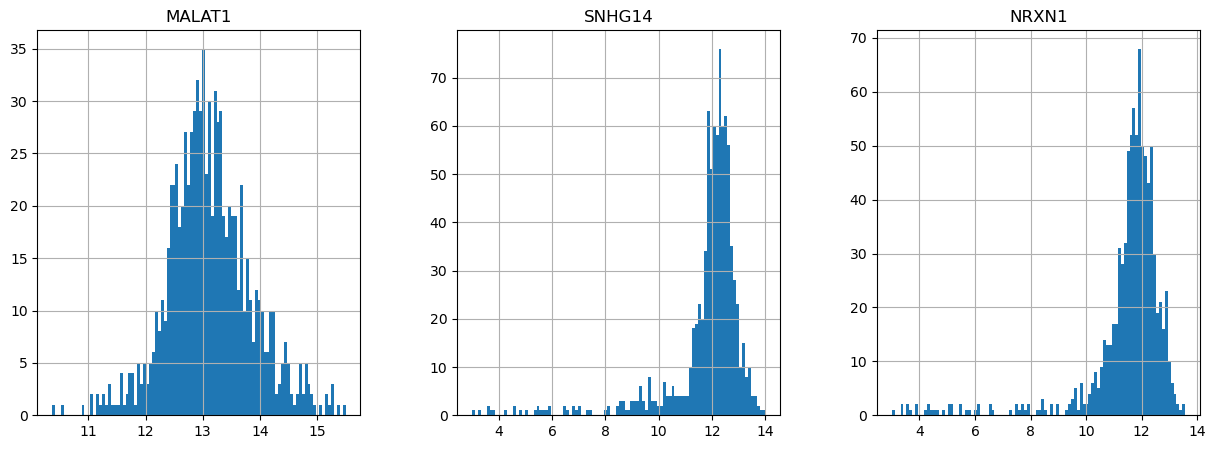

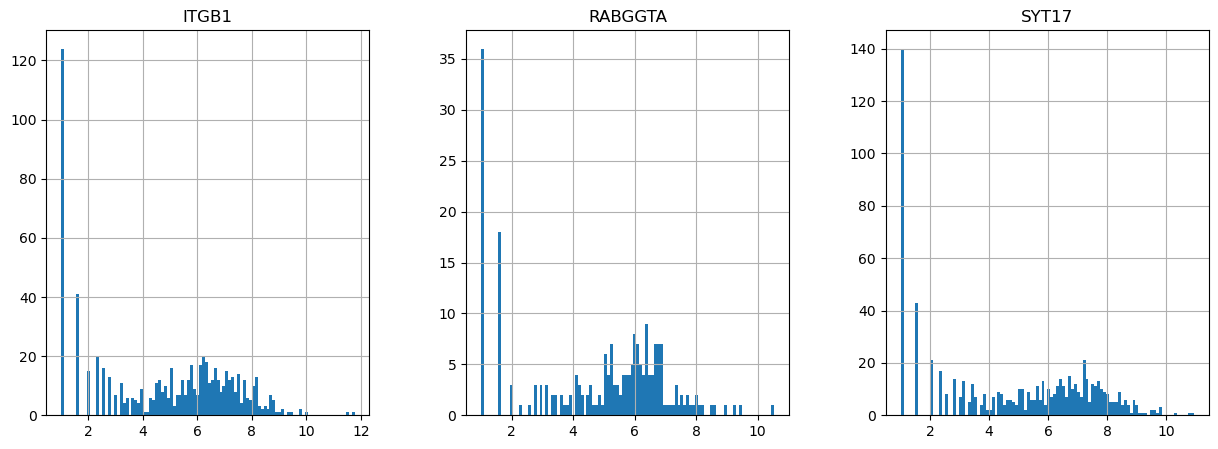

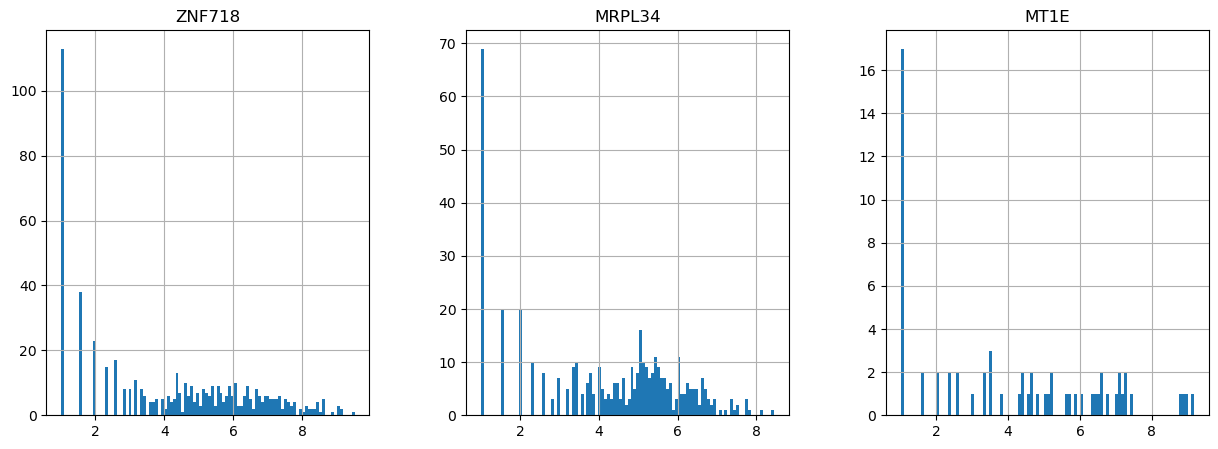

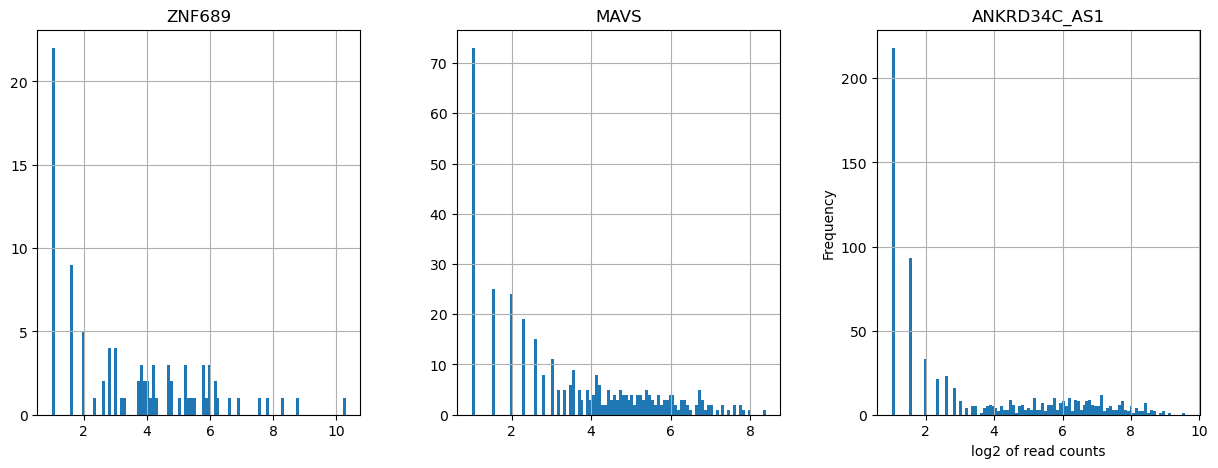

In [10]:
# histogram of the expression levels at the highest, 75% percetile, 50% percentile, 25% percentile

df_noZero.hist(column=["MALAT1","SNHG14", "NRXN1"], bins=100,layout=(1, 3), figsize=(15, 5))
df_noZero.hist(column=["ITGB1","RABGGTA", "SYT17"], bins=100,layout=(1, 3), figsize=(15, 5))
df_noZero.hist(column=["ZNF718","MRPL34", "MT1E"], bins=100,layout=(1, 3), figsize=(15, 5))
df_noZero.hist(column=["ZNF689","MAVS", "ANKRD34C_AS1"], bins=100,layout=(1, 3), figsize=(15, 5))
plt.xlabel('log2 of read counts',ha='center')
plt.ylabel('Frequency')



In [11]:
noZero25thpercentile = np.nanpercentile(noZeromean, 25)

noZero75thpercentile = np.nanpercentile(noZeromean, 75)
print(noZero25thpercentile, noZero75thpercentile)
# (df_noZeromean > noZero25thpercentile)
# (df_noZeromean < noZero75thpercentile)
df_25 = noZeromean[(noZeromean > 3.36)]
#print(def_25)
#and (df_noZeromean < 4.62)]
df_25To75 = df_25[(df_25 < 4.62)]
df_25To75.describe()
#3.3652830123901367 4.625155448913574


3.3652830123901367 4.625155448913574


count    8203.000000
mean        4.008715
std         0.336319
min         3.360417
25%         3.741658
50%         4.019036
75%         4.280718
max         4.619928
dtype: float64

# Transfer cellXGene to binary

In [13]:


adata_new.X[adata_new.X<1] = 0
adata_new.X[adata_new.X>=1] = 1
adata_new.X=adata_new.X.astype(int)



# Transfer cellXGene to cellTypeXGene

In [15]:
bi_cellXGene = pd.DataFrame(adata_new.X,index = adata_new.obs.index )
bi_cellXGene.columns = adata_new.var_names
bi_cellXGene["cluster"] = adata_new.obs["cluster"]

#print(bi_cellXGene.head())
df_cellType=bi_cellXGene.groupby(["cluster"]).mean()
#print(df_cellType.head())

# Generate the gene list for goEnrichment 

Generate the gene list for each cluster including the gene expressed in more than 50% cells.

In [17]:
l=list((adata_new.var).index)
for i in range(len(df_cellType.index)):
    row0=list(df_cellType.iloc[i]>0.5)
    cell_type=df_cellType.index[i]
    gene_list=list(compress(l, row0))
    print(len(set(gene_list)))
    with open(cell_type+"filtered_list.txt", "w") as f:
        f.write(cell_type+"\n")
        for item in gene_list:
            f.write(item+"\n")

8326
5285
4918
4372
5008
7425
7049
7382
7422
7004
6922
8279
7416
8111
8513
7580
